# 🚀 Variational Autoencoders - Generate

In this notebook, we'll walk through the steps required to generate images using the autoencoder trained the fashion MNIST dataset.

## Table of contents
0. [Parameters](#parameters)
1. [Prepare the Data](#prepare)
2. [Load the Model](#model)
3. [Reconstruct using the autoencoder](#reconstruct)
4. [Embed using the encoder](#encode)
5. [Generate using the decoder](#decode)
6. [Explore the latent space](#explore)

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
%%html
<style>table {display: inline-block}</style>

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.data import Dataset
import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing import image_dataset_from_directory

from scipy.stats import norm

from utils.image import preprocess, noise, display
from utils.datasets import sample_batches, sample_batch

## 0. Parameters <a name="parameters"></a>

## 1. Prepare the data <a name="prepare"></a>

In [4]:
# Load the data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
# Preprocess the data
x_train = preprocess(x_train)
x_test = preprocess(x_test)

## 2. Load the model <a name="model"></a>

In [6]:
## Load the model trained in 01_train.ipynb
vae = load_model("./models/vae", compile=False)
encoder = load_model("./models/encoder", compile=False)
decoder = load_model("./models/decoder", compile=False)

## 3. Reconstruct using the variational autoencoder <a name="reconstruct"></a>

In [7]:
# Select a subset of the test set
n_to_predict = 5000
example_images = x_test[:n_to_predict]
example_labels = y_test[:n_to_predict]

Example real clothing items


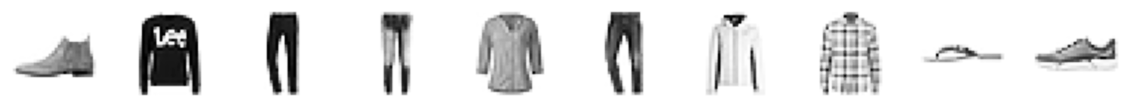

Reconstructions


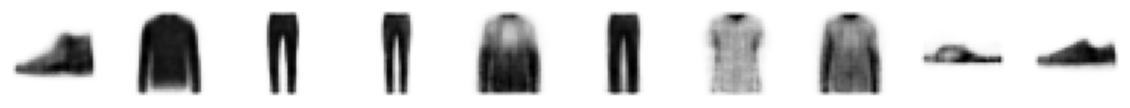

In [8]:
# Create autoencoder predictions and display
z_mean, z_log_var, reconstructions = vae.predict(example_images)
print("Example real clothing items")
display(example_images)
print("Reconstructions")
display(reconstructions)

## 4. Embed using the encoder <a name="encode"></a>

In [9]:
# Encode the example images
z_mean, z_var, z = encoder.predict(example_images)

In [10]:
# Some examples of the embeddings
print(z[:10])

[[-0.77081585  1.3296491 ]
 [ 0.85895187  0.08022632]
 [ 1.3311739  -2.464593  ]
 [-0.18600217 -2.584265  ]
 [-0.0143263  -0.13755186]
 [ 0.62277377 -1.6423117 ]
 [-0.89218026 -0.72008973]
 [-0.27465686 -0.27997658]
 [-2.711635   -0.19754139]
 [-1.8982905   0.53481334]]


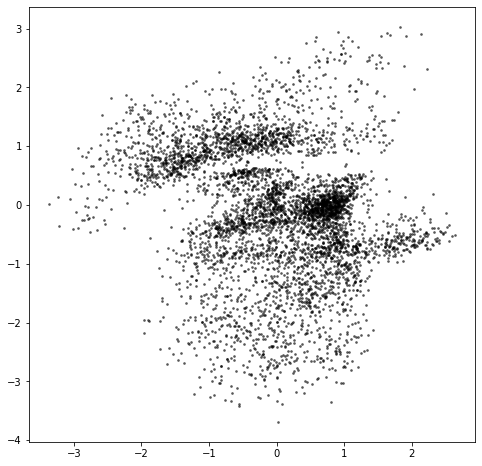

In [11]:
# Show the encoded points in 2D space
figsize = 8

plt.figure(figsize=(figsize, figsize))
plt.scatter(z[:, 0], z[:, 1], c="black", alpha=0.5, s=3)
plt.show()

## 5. Generate using the decoder <a name="decode"></a>

In [12]:
#Sample some points in the latent space, from the standard normal distribution
grid_width, grid_height = (6,3)
z_sample = np.random.normal(size=(grid_width * grid_height,2))

In [13]:
# Decode the sampled points
reconstructions = decoder.predict(z_sample)

In [14]:
# Convert original embeddings and sampled embeddings to p-values
p = norm.cdf(z)
p_sample = norm.cdf(z_sample)

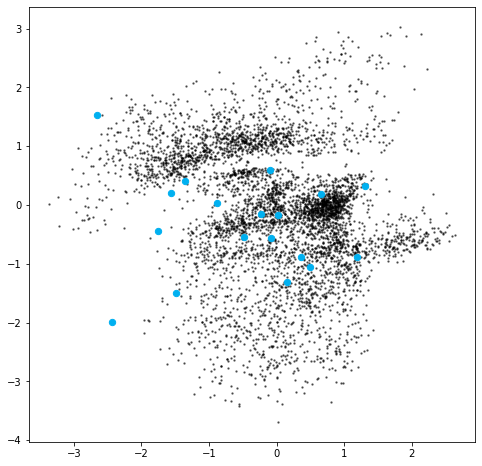

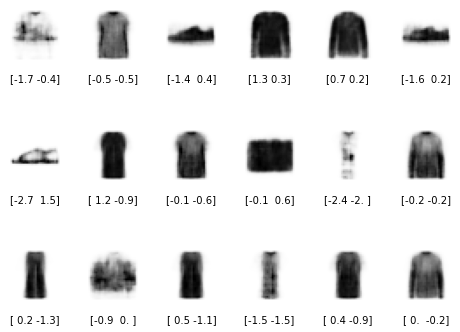

In [16]:
# Draw a plot of...
figsize = 8
plt.figure(figsize=(figsize, figsize))

# ... the original embeddings ...
plt.scatter(z[:, 0], z[:, 1], c="black", alpha=0.5, s=2)

# ... and the newly generated points in the latent space
plt.scatter(z_sample[:, 0], z_sample[:, 1], c="#00B0F0", alpha=1, s=40)
plt.show()

# Add underneath a grid of the decoded images
fig = plt.figure(figsize=(figsize, grid_height * 2))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(grid_width * grid_height):
    ax = fig.add_subplot(grid_height, grid_width, i + 1)
    ax.axis("off")
    ax.text(0.5, -0.35, str(np.round(z_sample[i,:], 1)), fontsize=10, ha="center", transform=ax.transAxes)
    ax.imshow(reconstructions[i, :, :], cmap="Greys")

## 6. Explore the latent space <a name="explore"></a>

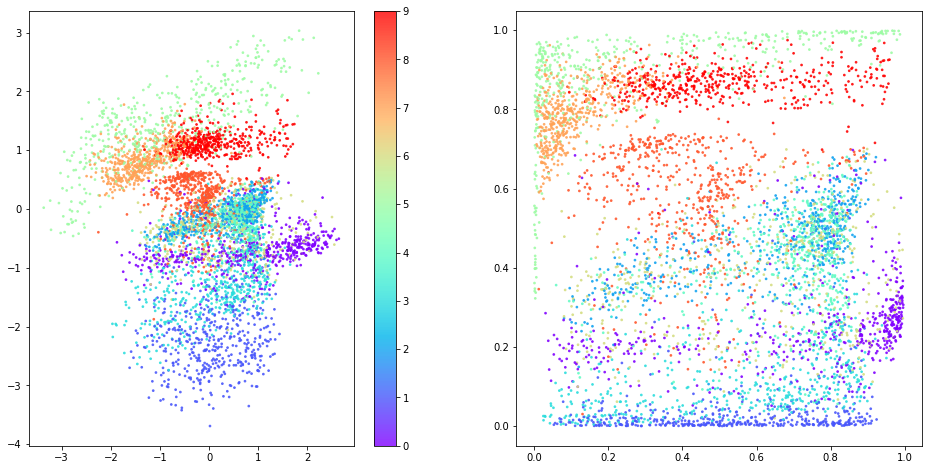

In [17]:
# Colour the embeddings by their label (clothing type - see table)
figsize = 8
fig = plt.figure(figsize=(figsize*2, figsize))
ax = fig.add_subplot(1, 2, 1)
plot_1 = ax.scatter(z[:, 0], z[:, 1], cmap="rainbow", c=example_labels, alpha=0.8, s=3)
plt.colorbar(plot_1)
ax = fig.add_subplot(1, 2, 2)
plot_2 = ax.scatter(p[:, 0], p[:, 1], cmap="rainbow", c=example_labels, alpha=0.8, s=3)
plt.show()

| ID | Clothing Label |
| :- | :- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

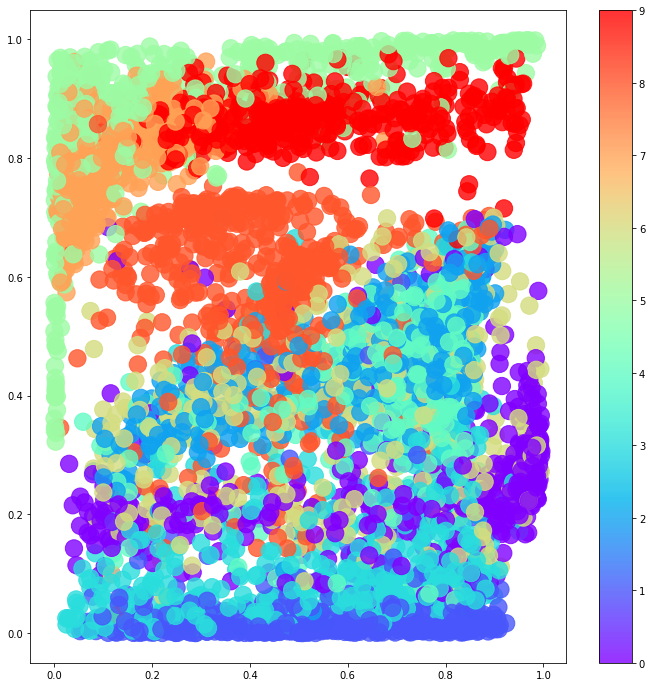

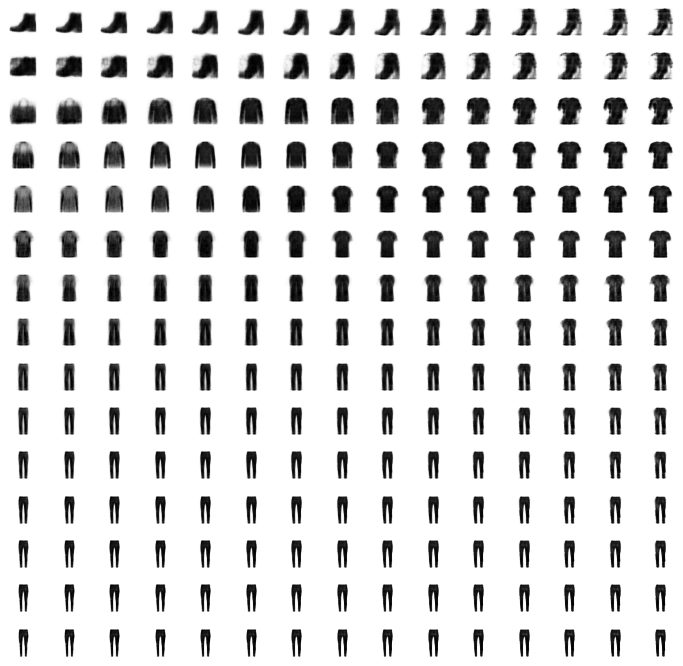

In [21]:
# Colour the embeddings by their label (clothing type - see table)
figsize = 12
grid_size = 15
plt.figure(figsize=(figsize, figsize))
plt.scatter(p[:, 0], p[:, 1], cmap="rainbow", c=example_labels, alpha=0.8, s=300)
plt.colorbar()

x = np.linspace(min(p[:, 0]), max(z[:, 0]), grid_size)
y = np.linspace(max(p[:, 1]), min(z[:, 1]), grid_size)
xv, yv = np.meshgrid(x, y)
xv = xv.flatten()
yv = yv.flatten()
grid = np.array(list(zip(xv, yv)))

reconstructions = decoder.predict(grid)
# plt.scatter(grid[:, 0], grid[:, 1], c="black", alpha=1, s=10)
plt.show()

fig = plt.figure(figsize=(figsize, figsize))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(grid_size**2):
    ax = fig.add_subplot(grid_size, grid_size, i + 1)
    ax.axis("off")
    ax.imshow(reconstructions[i, :, :], cmap="Greys")
    